<a href="https://colab.research.google.com/github/asandy1023/python-demo/blob/main/simple_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make a world population map based on countries
import sys
!{sys.executable} -m pip install pygal
!{sys.executable} -m pip install pygal_maps_world
import json
from pygal_maps_world.i18n import COUNTRIES
from pygal_maps_world.maps import World

def getCountryCode(countryName):
    '''Enter country name'''
    for dictCode, dictName in COUNTRIES.items():  # Search country code
        if dictName == countryName:
            return dictCode # Return if found
    return None # Return None if not found

# data source. https://github.com/samayo/country-json/blob/master/src/country-by-population.json
fn = 'simple_data_resource/populations.json'
with open(fn) as fnObj:
    getDatas = json.load(fnObj) # read population data json

dictData = {} # dictData["countryName"] = "population"
for getData in getDatas:
    countryName = getData['country']  # Country Name
    countryCode = getCountryCode(getData['country'])
    population = int(float(getData['population']))  # Population       
    if countryCode != None:
        dictData[countryCode] = population  # set dictData

dict1, dict2 = {}, {} # Dictionary defining population grading
for code, population in dictData.items():
    if population > 100000000:
        dict1[code] = population  # Over 100 million
    else:
        dict2[code] = population  # Under 100 million

worldMap = World()
worldMap.title = "World Population in 2020"
worldMap.add('Over 100 million', dict1)
worldMap.add('Under 100 million', dict2)
worldMap.render_to_file('World_Population_in_2020.svg') # save map file


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


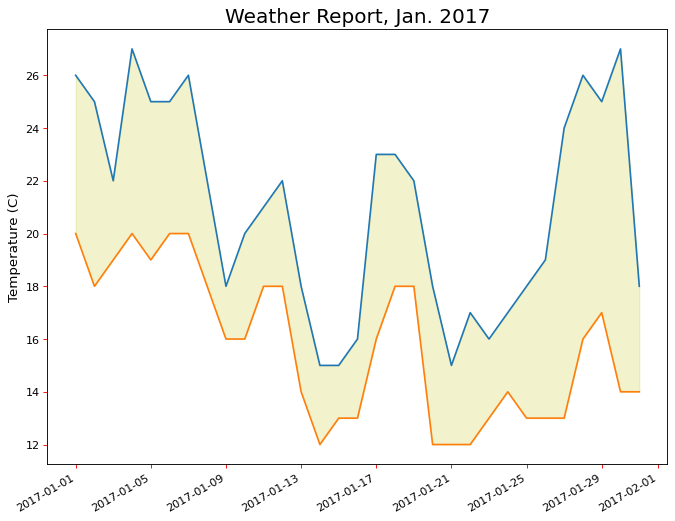

In [ ]:
# read csv plot maximum/minimum temperature
import csv
import matplotlib.pyplot as plt
from datetime import datetime

fn = 'simple_data_resource/TaipeiWeatherJan.csv'
with open(fn) as csvFile:
    csvReader = csv.reader(csvFile)
    headerRow = next(csvReader) # read the next line of the file
    dates, highTemps, lowTemps = [], [], [] # set empty list
    for row in csvReader:
        try:                    
            currentDate = datetime.strptime(row[0], "%Y/%m/%d")
            highTemp = int(row[1])  # set maximum temperature
            lowTemp = int(row[3]) # set minimum temperature
        except Exception:
            print('missing value')
        else: # append
            highTemps.append(highTemp)
            
            lowTemps.append(lowTemp)
            
            dates.append(currentDate)
            
       
fig = plt.figure(dpi=80, figsize=(10, 8))
# Set the drawing area
plt.plot(dates, highTemps)
# plot maximum temperature
plt.plot(dates, lowTemps)
# plot minimum temperature
plt.fill_between(dates, highTemps, lowTemps, color='y', alpha=0.2)
# fill the interval with yellow
fig.autofmt_xdate()
# date flip
plt.title("Weather Report, Jan. 2017", fontsize=18)
plt.xlabel("", fontsize=12)
plt.ylabel("Temperature (C)", fontsize=12)
plt.tick_params(axis='both', labelsize=10, color='red')
plt.show()




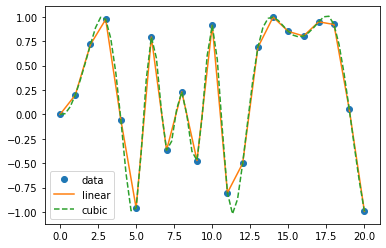

In [ ]:
# scipy.interpolate.interp1d
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.linspace(0,20,21)
y = np.sin(x**2/5.0)

fLinear = interp1d(x,y)
# Linear Interpolation function
fCubic = interp1d(x,y,kind='cubic')
# Cubic Interpolation function
xnew = np.linspace(0,20,61)
# Augmented x-axis data

plt.plot(x,y,'o',label='data')  # data
plt.plot(xnew,fLinear(xnew),'-',label='linear') # Linear
plt.plot(xnew,fCubic(xnew),'--',label='cubic')  # Cubic
plt.legend(loc='best')
plt.show()

In [ ]:
# pandas.Series
import pandas as pd
years = range(2020, 2023)
taipei = pd.Series([20, 21, 19], index = years)
hongkong = pd.Series([25, 26, 27], index = years)
singapore = pd.Series([30, 29, 31], index = years)
citydf = pd.concat([taipei, hongkong, singapore])  # preset axis=0
print(type(citydf))
print(citydf)

<class 'pandas.core.series.Series'>
2020    20
2021    21
2022    19
2020    25
2021    26
2022    27
2020    30
2021    29
2022    31
dtype: int64


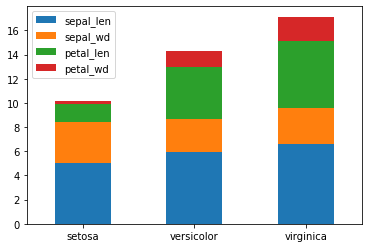

In [ ]:
# plt iris histogram
import pandas as pd
import matplotlib.pyplot as plt

colName = ['sepal_len','sepal_wd','petal_len','petal_wd','species']
iris = pd.read_csv('simple_data_resource/iris.csv', names = colName)
iris['species'] = iris['species'].apply(lambda x: x.replace("Iris-",""))
# Statistical mean of iris "group"
iris_mean = iris.groupby('species', as_index=False).mean()
# Plot a stacked bar chart
iris_mean.plot(kind='bar',stacked=True)
# Scale processing
plt.xticks(iris_mean.index,iris_mean['species'], rotation=0)

plt.show()